# Music Recommendation System

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train = pd.read_csv(r"C:\Users\anjali\Downloads\train.csv\train.csv")
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(r"C:\Users\anjali\Downloads\train.csv\train.csv")
songs = pd.read_csv(r"C:\Users\anjali\Downloads\train.csv\songs.csv")
members = pd.read_csv(r"C:\Users\anjali\Downloads\train.csv\members.csv")
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
train.shape

(7377418, 6)

In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


# Visualization

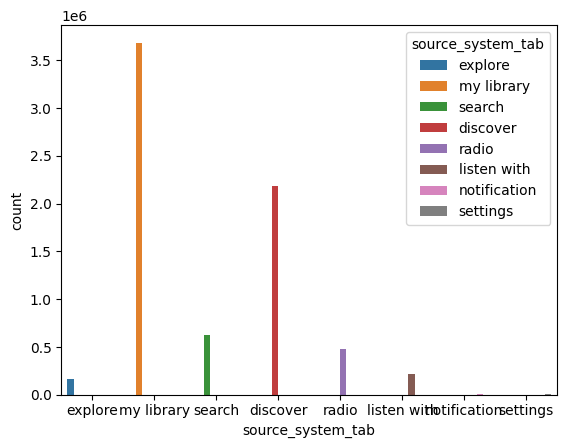

In [7]:
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab']);

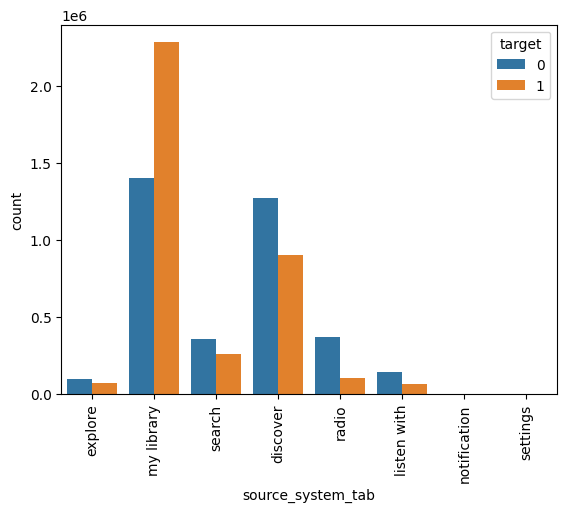

In [8]:
sns.countplot(x = train['source_system_tab'],hue=train['target']);
plt.xticks(rotation =90)
plt.show()

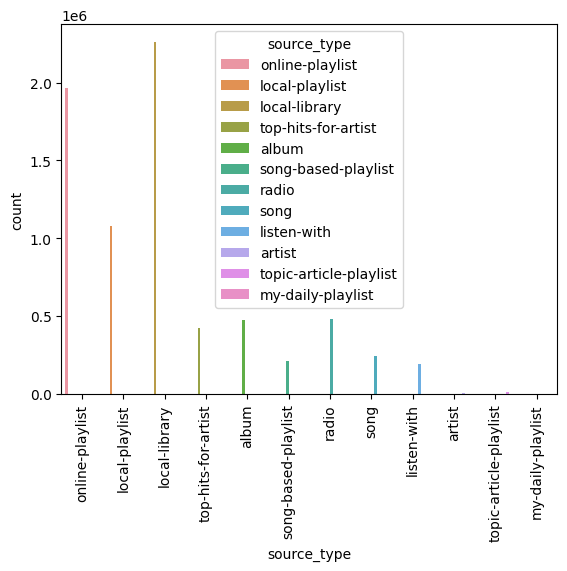

In [9]:
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v');
plt.xticks(rotation =90)
plt.show()

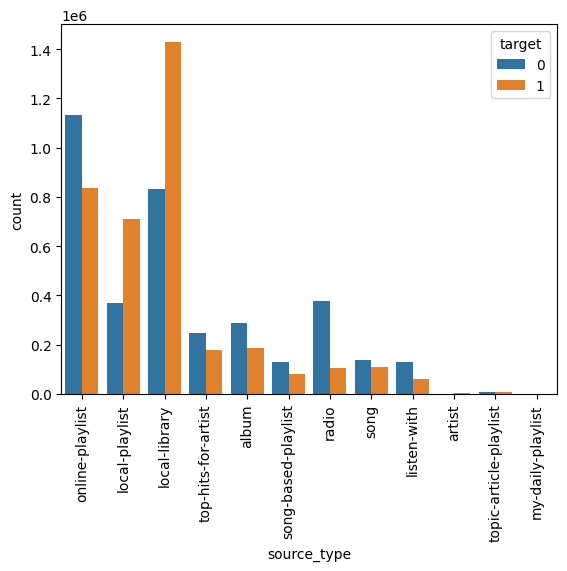

In [10]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

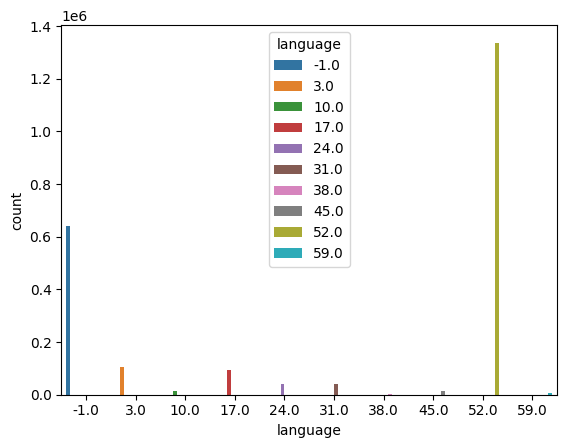

In [11]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v');

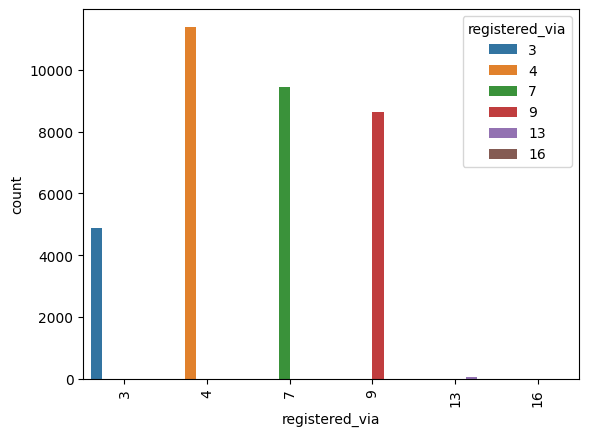

In [12]:
sns.countplot(x = members['registered_via'],hue=members['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show()

# Preprocessing

In [3]:
train_df=pd.merge(train,songs.drop_duplicates(['song_id']),on='song_id',how='left')
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0


In [5]:
len(train_df)

7377418

In [4]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

for i in train_df.columns :
    train_df[i] = encoder.fit_transform(train_df[i])
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,8158,74679,1,7,6,1,19020,285,3277,14581,33888,8
1,17259,223479,3,8,4,1,36984,90,31960,76064,33888,8
2,17259,120758,3,8,4,1,23675,90,21372,45057,33888,8
3,17259,23707,3,8,4,1,30969,6,27439,36700,33888,0
4,8158,33308,1,7,6,1,14877,2,4472,8485,33888,8


<AxesSubplot:>

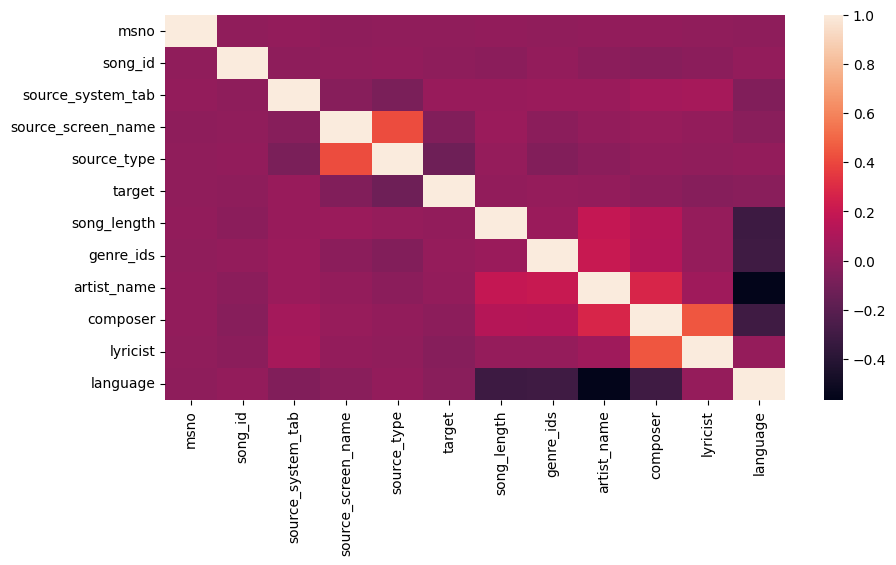

In [19]:
plt.figure(figsize=[10,5])
sns.heatmap(train_df.corr())

# Random Forest

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
X , y = train_df.drop('target' , axis=1) , train_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
randFor = RandomForestClassifier()

In [22]:
randFor.fit(X_train, y_train)

KeyboardInterrupt: 

In [34]:
predict= randFor.predict(X_test)

c:\users\anjali\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:891: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


AttributeError: 'list' object has no attribute 'take'

In [35]:

score=accuracy_score(y_test , predict)
print("Accuracy is ", score*100," %")

NameError: name 'predict' is not defined

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
bdt=DecisionTreeClassifier()

In [28]:
bdt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred=bdt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 59.39
